In [ ]:
import numpy as np
import pandas as pd
import sklearn
import datetime


In [ ]:
#MAKE SURE TO REFER TO THE RAW VERSION OF THE CSV ON GITHUB!
automobile_df = pd.read_csv('https://raw.githubusercontent.com/JohnMHoyt24/data-prep/main/cars.csv')
automobile_df = automobile_df.replace('?', np.nan)
automobile_df.head(5)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
automobile_df.isna().sum()


mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [ ]:
automobile_df['mpg'] = automobile_df['mpg'].fillna(automobile_df['mpg'].mean())
automobile_df.isna().sum()


mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [ ]:
automobile_df['car name'].loc[automobile_df['car name'].str.isnumeric() == False]

0      chevrolet chevelle malibu
1              buick skylark 320
2             plymouth satellite
3                  amc rebel sst
4                    ford torino
                 ...            
393              ford mustang gl
394                    vw pickup
395                dodge rampage
396                  ford ranger
397                   chevy s-10
Name: car name, Length: 398, dtype: object

In [ ]:
automobile_df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


Text(0, 0.5, 'Miles per Gallon')

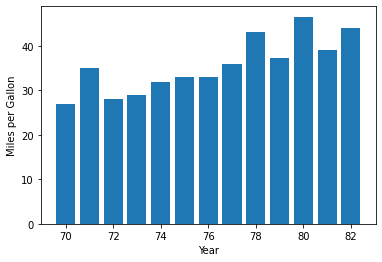

In [ ]:
import matplotlib.pyplot as plt
plt.bar(automobile_df['model year'], automobile_df['mpg'])
plt.xlabel('Year')
plt.ylabel('Miles per Gallon')


Text(0, 0.5, 'Miles per Gallon')

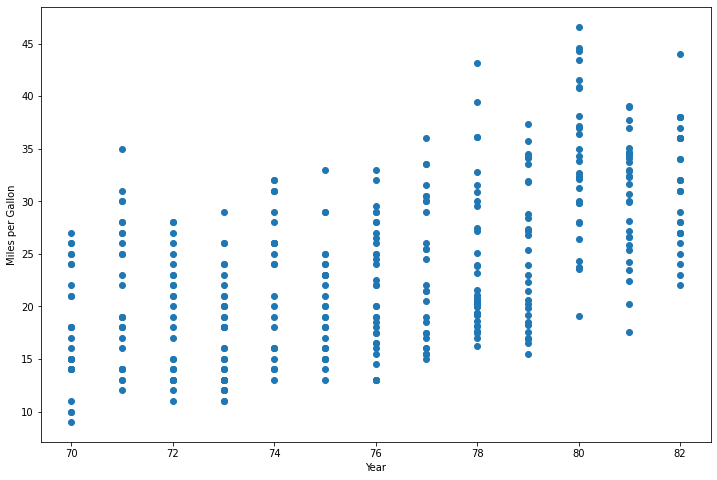

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(automobile_df['model year'], automobile_df['mpg'])
plt.xlabel('Year')
plt.ylabel('Miles per Gallon')

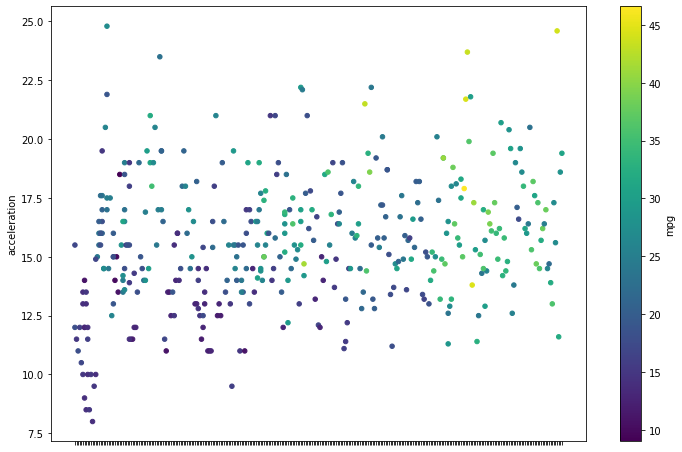

In [68]:
automobile_df.plot.scatter(
    x='car name',
    y='acceleration',
    c='mpg',
    colormap='viridis',
    figsize=(12,8));

In [73]:
cars_corr = automobile_df.corr()

cars_corr

,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


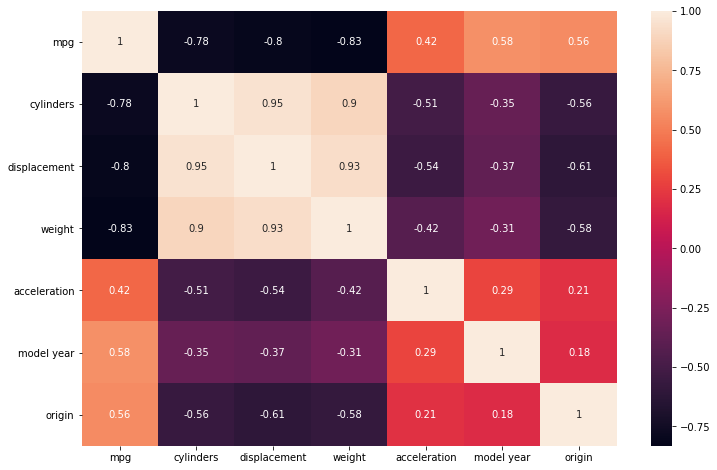

In [74]:
import seaborn as sns

fig, ax = plt.subplots(figsize = (12,8))
sns.heatmap(cars_corr, annot = True)